In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Tahap 1: Pengumpulan dan Inspeksi Data 

# 1. Identifikasi: Muat dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t') 

# 2. Inspeksi Awal - 5 baris pertama
print("5 Baris Pertama")
print(df.head())
print("\n") 

5 Baris Pertama
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \

In [3]:
# 3. Inspeksi Awal - Periksa tipe data
print("Tipe Data") 
print(df.info())
print("\n")

Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 no

In [4]:
# 4. Inspeksi Awal - Hitung jumlah nilai hilang
print("Jumlah Nilai Hilang (Awal): ")
print(df.isnull().sum()) 

Jumlah Nilai Hilang (Awal): 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# Tahap 2: Penanganan Nilai Hilang (Missing Values)

# 1. Hitung Median dari kolom 'Income' 
# .median() secara otomatis mengabaikan nilai NaN saat perhitungan
median_income = df['Income'].median()
print(f"Median 'Income' yang akan digunakan untuk imputasi: {median_income}") 

Median 'Income' yang akan digunakan untuk imputasi: 51381.5


In [6]:
# 2. Terapkan Imputasi Median
# Kita mengisi 24 nilai yang hilang (NaN) dengan nilai median
df['Income'] = df['Income'].fillna(median_income)

# 3. Verifikasi Hasil
print("Verifikasi Setelah Imputasi")
print("Jumlah nilai hilang di kolom 'Income' sekarang:") 
print(df['Income'].isnull().sum())

Verifikasi Setelah Imputasi
Jumlah nilai hilang di kolom 'Income' sekarang:
0


In [7]:
# 4. Hitung kembali jumlah nilai hilang
print("Jumlah Nilai Hilang (setelah di Imputasi): ")
print(df.isnull().sum()) 

Jumlah Nilai Hilang (setelah di Imputasi): 
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [8]:
# Tahap 3: Penanganan Data Kategorikal dan High Cardinality

# Analisis Awal (Inspeksi Kategori)
# 1. Inspeksi nilai unik di 'Education'
print("Nilai Unik di 'Education': ") 
print(df['Education'].unique())
print(f"Jumlah nilai unik: {df['Education'].nunique()}")

Nilai Unik di 'Education': 
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Jumlah nilai unik: 5


In [9]:
# 2. Inspeksi nilai unik di 'Marital_Status'
print("Nilai Unik di 'Marital_Status': ") 
print(df['Marital_Status'].unique())
print(f"Jumlah nilai unik: {df['Marital_Status'].nunique()}")

Nilai Unik di 'Marital_Status': 
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Jumlah nilai unik: 8


In [10]:
# Analisis Frekuensi (High Cardinality)
# Hitung frekuensi untuk setiap kategori Marital_Status
print("Frekuensi 'Marital_Status': ")
print(df['Marital_Status'].value_counts()) 

Frekuensi 'Marital_Status': 
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [11]:
# 1. Penanganan High Cardinality: Kelompokkan kategori langka di 'Marital_Status'
# Berdasarkan inspeksi, kita kelompokkan nilai-nilai anomali/langka
rare_categories = ['Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = df['Marital_Status'].replace(rare_categories, 'Lain-Lain')
 
# Verifikasi hasil pengelompokan
print("'Marital_Status' Setelah Pengelompokan: ")
print(df['Marital_Status'].unique())

'Marital_Status' Setelah Pengelompokan: 
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Lain-Lain']


In [12]:
# 2. Terapkan One-Hot Encoding
# Kita menggunakan pd.get_dummies() untuk membuat kolom baru untuk setiap kategori
# 'drop_first=True' adalah praktik yang baik untuk menghindari multikolinearitas
# (Ini akan dibahas di agenda Feature Selection Anda)
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# 3. Verifikasi Hasil 
print("\nDataframe Setelah One-Hot Encoding (5 Baris Pertama): ")
print(df_encoded.head())


Dataframe Setelah One-Hot Encoding (5 Baris Pertama): 
     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  04-09-2012       58   
1  2174        1954  46344.0        1         1  08-03-2014       38   
2  4141        1965  71613.0        0         0  21-08-2013       26   
3  6182        1984  26646.0        1         0  10-02-2014       26   
4  5324        1981  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  ...  Response  Education_Basic  \
0       635         88              546  ...         1            False   
1        11          1                6  ...         0            False   
2       426         49              127  ...         0            False   
3        11          4               20  ...         0            False   
4       173         43              118  ...         0            False   

   Education_Graduation  Education_Master  Education_PhD  \


In [13]:
# Tampilkan daftar kolom baru untuk melihat perubahannya
print("Daftar Kolom Baru: ")
print(df_encoded.columns) 

Daftar Kolom Baru: 
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Lain-Lain', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')


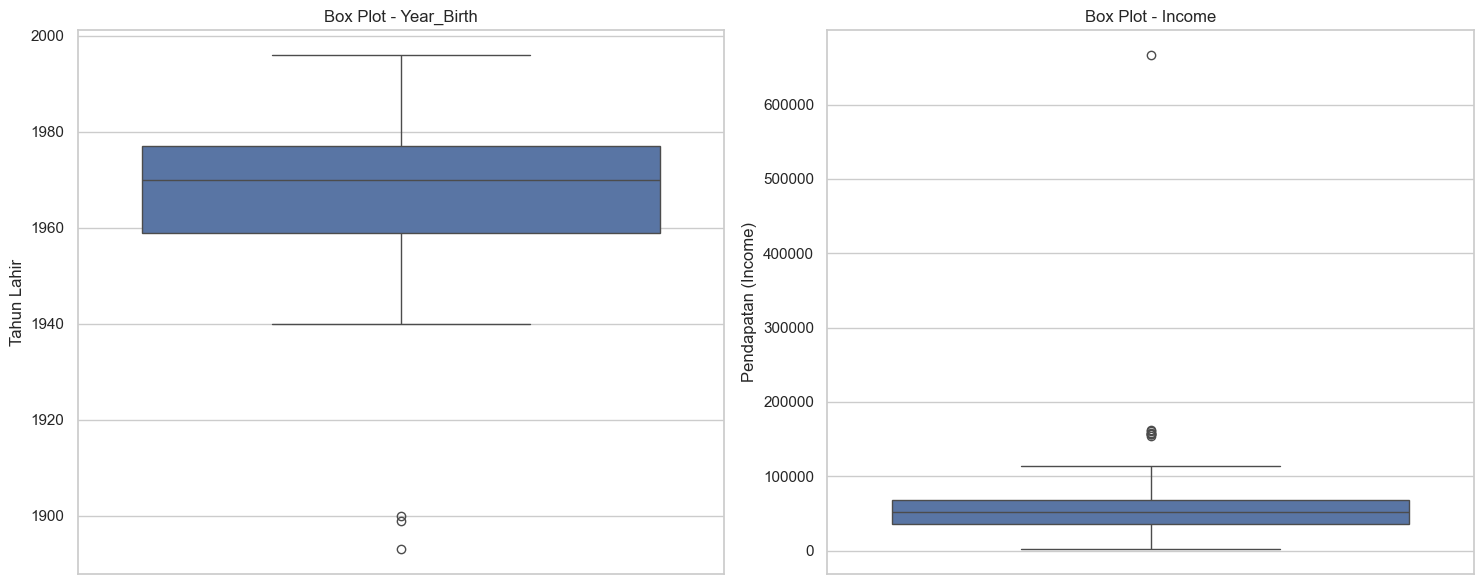

In [14]:
# Tahap 4: Penanganan Outlier

# Visualisasi (Deteksi Outlier)
# Atur gaya plot
sns.set(style="whitegrid")

# Buat gambar dengan 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
 
# 1. Buat Box Plot untuk 'Year_Birth'
sns.boxplot(ax=axes[0], y=df['Year_Birth'])
axes[0].set_title('Box Plot - Year_Birth')
axes[0].set_ylabel('Tahun Lahir')

# 2. Buat Box Plot untuk 'Income'
sns.boxplot(ax=axes[1], y=df['Income'])
axes[1].set_title('Box Plot - Income')
axes[1].set_ylabel('Pendapatan (Income)')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [15]:
# Terapkan Capping untuk 'Year_Birth' (Menangani usia anomali)
Q1_year = df['Year_Birth'].quantile(0.25)
Q3_year = df['Year_Birth'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

print(f"Capping untuk 'Year_Birth': ")
print(f"Batas Bawah: {lower_bound_year}, Batas Atas: {upper_bound_year}")

# Terapkan Capping
# Kita hanya cap pada batas bawah (usia terlalu tua)
df['Year_Birth'] = np.where(
    df['Year_Birth'] < lower_bound_year, 
    lower_bound_year, 
    df['Year_Birth']
)

# Terapkan Capping untuk 'Income' (Menangani pendapatan ekstrem)
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

print(f"\nCapping untuk 'Income': ")
print(f"Batas Bawah: {lower_bound_income}, Batas Atas: {upper_bound_income}")

# Terapkan Capping
# Kita hanya cap pada batas atas (pendapatan terlalu tinggi)
df['Income'] = np.where(
    df['Income'] > upper_bound_income, 
    upper_bound_income, 
    df['Income']
)

print("\nOutlier telah ditangani (di-cap)")

Capping untuk 'Year_Birth': 
Batas Bawah: 1932.0, Batas Atas: 2004.0

Capping untuk 'Income': 
Batas Bawah: -13587.75, Batas Atas: 117416.25

Outlier telah ditangani (di-cap)


--- Verifikasi Box Plot (Setelah Capping) ---


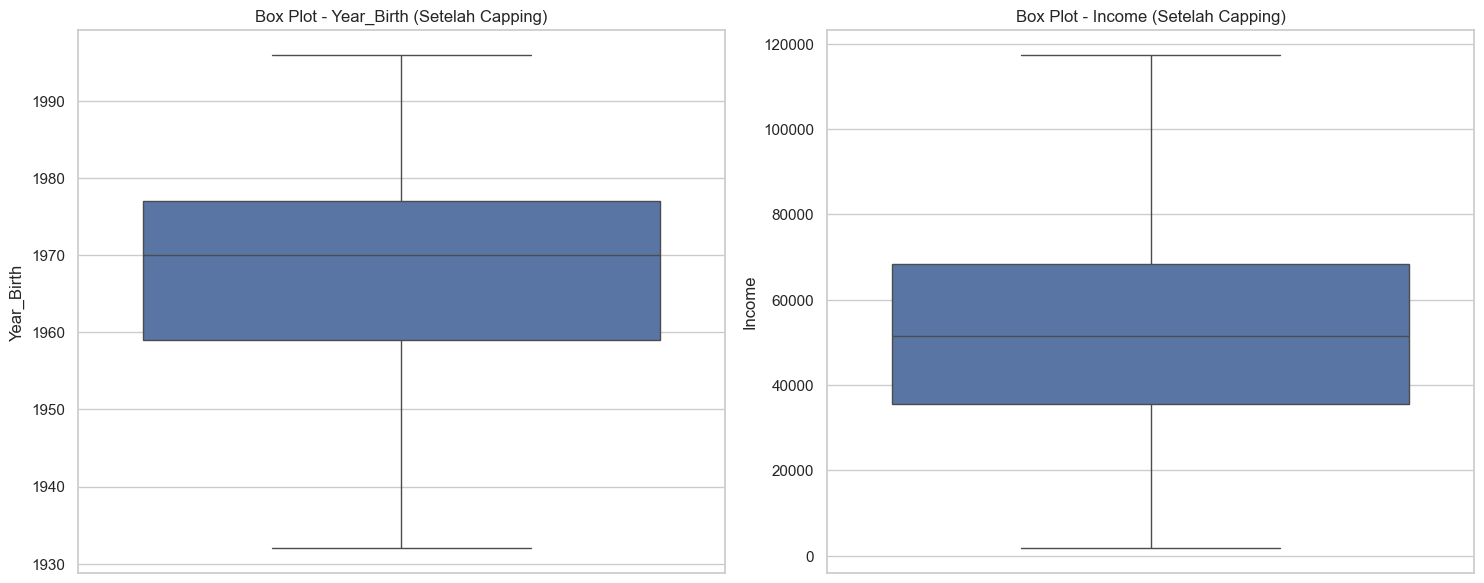

In [16]:
# Verifikasi: Kita bisa membuat ulang box plot untuk melihat perubahannya
print("--- Verifikasi Box Plot (Setelah Capping) ---")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(ax=axes[0], y=df['Year_Birth']).set_title('Box Plot - Year_Birth (Setelah Capping)')
sns.boxplot(ax=axes[1], y=df['Income']).set_title('Box Plot - Income (Setelah Capping)')
plt.tight_layout()

plt.show() 

In [17]:
# Tahap 5: Penskalaan Fitur

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Persiapan Sebelum Scaling 
# 1. Mulai dari df_encoded (hasil Langkah 3) dan hapus kolom yang tidak relevan
# Kita membuat variabel baru agar jelas
df_processed = df_encoded.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

# 2. Pisahkan Fitur (X) dan Target (y)
X = df_processed.drop('Response', axis=1)
y = df_processed['Response']

# 3. Bagi Data (Train-Test Split)
# Kita tetap menggunakan stratify=y karena data kita Imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Identifikasi kolom yang akan di-scale 
# Kita pilih semua kolom yang tipe datanya float atau int, bukan biner
numerical_cols = [
    col for col in X_train.columns 
    if X_train[col].dtype in ['int64', 'float64'] 
    and X_train[col].nunique() > 2
]

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print("\nKolom yang akan di-scale:")
print(numerical_cols)

Bentuk X_train: (1792, 31)
Bentuk X_test: (448, 31)

Kolom yang akan di-scale:
['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [18]:
# Menerapkan Penskalaan Fitur 

# 1. Inisialisasi StandardScaler
scaler = StandardScaler()

# 2. Terapkan Penskalaan (fit hanya pada data latih)
# Sekarang scaler.fit() hanya akan menerima kolom numerik yang benar
scaler.fit(X_train[numerical_cols])

# 3. Terapkan (transform) pada Data Latih dan Data Uji
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nPenskalaan Selesai")

# Verifikasi: Tampilkan 5 baris pertama dari data latih yang sudah di-scale
print("Hasil X_train Setelah Scaling (5 Baris Pertama): ")
print(X_train.head()) 


Penskalaan Selesai
Hasil X_train Setelah Scaling (5 Baris Pertama): 
      Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
1090    0.342139  1.294143 -0.828060 -0.925853  0.444943  1.891312  -0.183717   
15     -1.943388  1.177283 -0.828060 -0.925853 -0.895179  2.093752  -0.108461   
873     1.019333 -0.373875  1.026794  0.899370 -0.482834 -0.758265  -0.334230   
610     0.003543 -0.969615 -0.828060 -0.925853  0.857289 -0.600481  -0.334230   
657    -0.927598 -0.984472 -0.828060 -0.925853  1.475807 -0.767196   0.518675   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
1090         3.021240        -0.229925          1.645925  ...         0   
15          -0.227785         0.387369          0.993932  ...         0   
873         -0.486635        -0.248081         -0.285907  ...         0   
610         -0.401839        -0.320703         -0.213464  ...         0   
657         -0.508950        -0.302548         -0.165168  ...       

In [19]:
# Tahap 6: Menyimpan Hasil Pra-pemrosesan I

print("--- Menyimpan hasil Pra-pemrosesan I ---")

# 1. Buat dataframe latih yang sudah lengkap (fitur + target)
# Kita gunakan .copy() untuk menghindari 'SettingWithCopyWarning'
train_df = X_train.copy()
train_df['Response'] = y_train

# 2. Buat dataframe uji yang sudah lengkap (fitur + target)
test_df = X_test.copy()
test_df['Response'] = y_test

# 3. Simpan ke file CSV baru
# index=False sangat penting agar tidak menyimpan indeks pandas sebagai kolom baru
train_df.to_csv('data_train_preprocessed.csv', index=False)
test_df.to_csv('data_test_preprocessed.csv', index=False)

print("Berhasil disimpan ke 'data_train_preprocessed.csv'")
print("Berhasil disimpan ke 'data_test_preprocessed.csv'")

--- Menyimpan hasil Pra-pemrosesan I ---
Berhasil disimpan ke 'data_train_preprocessed.csv'
Berhasil disimpan ke 'data_test_preprocessed.csv'
